Exercício 1 \
Imprima um gráfico de barras que mostre o valor médio do índice de percepção de corrupção por continente (faça a média dos índices dos países de cada continente). \
Dica: use a função groupby do pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [5]:
df.head(5)

Rank      Country  CPI_2014 Continent
0     1      Denmark        92    Europe
1     2  New Zealand        91   Oceania
2     3      Finland        89    Europe
3     4       Sweden        87    Europe
4     5       Norway        86    Europe

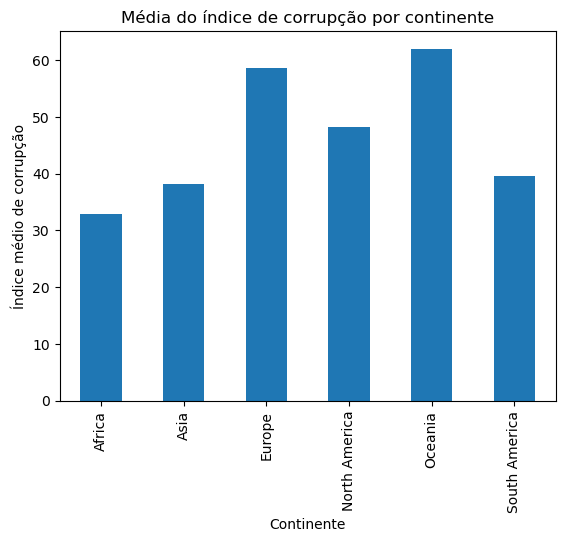

In [6]:
df= pd.read_csv("CPI_2014.csv", encoding ='latin-1')
media_por_continente =  df.groupby('Continent')['CPI_2014'].mean()
media_por_continente.plot(kind='bar')
plt.xlabel('Continente')
plt.ylabel('Índice médio de corrupção')
plt.title('Média do índice de corrupção por continente')
plt.show()


Exercício 2 \
Considere o dataframe "Bloodpressure.csv" \
a) gere um novo dataframe retirando o outlier 220 \
b) obtenha a média e o desvio padrão dos valores de pressão arterial \
c) obtenha os quartis dos valores de pressão arterial \
d) construa um boxplot dos valores de pressão arterial

In [19]:
media = df['SBP'].mean()
desvioPadaria = df['SBP'].std()
quartis = df['SBP'].quantile([0.25,0.5,0.75])
print(f"Media:{media}\nDesvio Padrão:{desvioPadaria}\nQuartis\n{quartis}")

Media:142.53333333333333
Desvio Padrão:22.581245396969603
Quartis
0.25    125.75
0.50    141.00
0.75    157.00
Name: SBP, dtype: float64


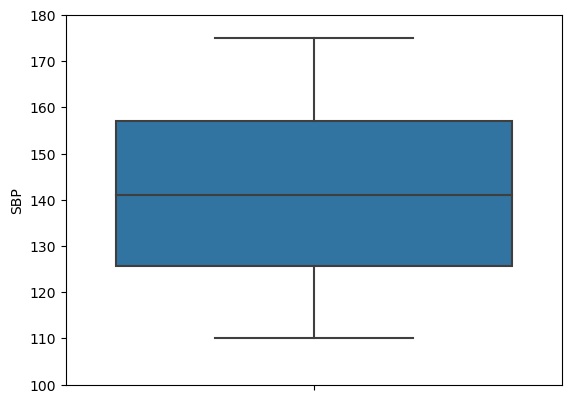

In [17]:
df = pd.read_csv("BloodPressure.csv")
df_real = df[df['SBP'] != 200]
media = df['SBP'].mean()
desvioPadaria = df['SBP'].std()
quartis = df['SBP'].quantile([0.25,0.5,0.75])
sns.boxplot(y='SBP', data=df_real)
plt.ylim(100,180)
plt.show()


Exercício 3 \
Usando o dataset 'usd2brl.csv' plote um gráfico de linha que mostre a evolução da cotação do dólar em relação ao real a partir de 2020.


In [21]:
df.head()

datetime  usd_brl
0  1994-07-04    0.940
1  1994-07-05    0.932
2  1994-07-06    0.915
3  1994-07-07    0.910
4  1994-07-08    0.920

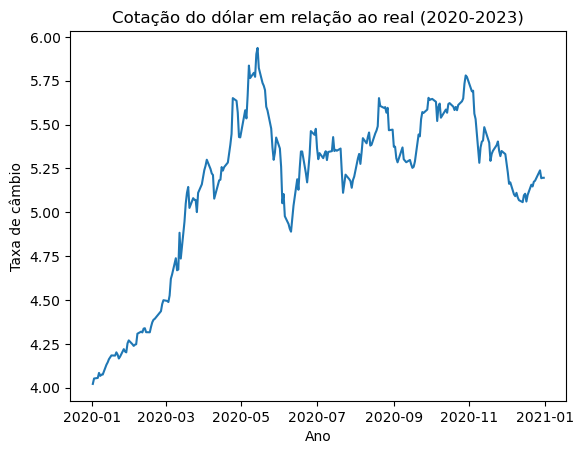

In [24]:
df= pd.read_csv("usd2brl.csv", encoding ='latin-1')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df[df['datetime'].dt.year >= 2020]
plt.plot(df['datetime'],df['usd_brl'])
plt.title('Cotação do dólar em relação ao real (2020-2023)')
plt.xlabel('Ano')
plt.ylabel('Taxa de câmbio')
plt.show()


Exercício 4 \
Utitilizando o dataset "world_population.csv", exiba um gráfico de barras mostrando a população dos 10 países que possuem maior área territorial (Land Area). \
Dica: use as funções nlargest e sort_values.

In [27]:
df.head()

Country/Other  Population (2020)  Yearly Change  Net Change  \
0          Afghanistan           38928346           2.33      886592   
1              Albania            2877797          -0.11       -3120   
2              Algeria           43851044           1.85      797990   
3               Angola           32866272           3.27     1040977   
4  Antigua and Barbuda              97929           0.84         811   

   Density (P/KmÂ²)  Land Area (KmÂ²)  Migrants (net)  Fert. Rate  Med. Age  \
0                60            652860          -62920         4.6        18   
1               105             27400          -14000         1.6        36   
2                18           2381740          -10000         3.1        29   
3                26           1246700            6413         5.6        17   
4               223               440               0         2.0        34   

   Urban Pop %  World Share  
0         25.0         0.50  
1         63.0         0.04  
2         73.0         0.56  
3         67.0         0.42  
4         26.0         0.00

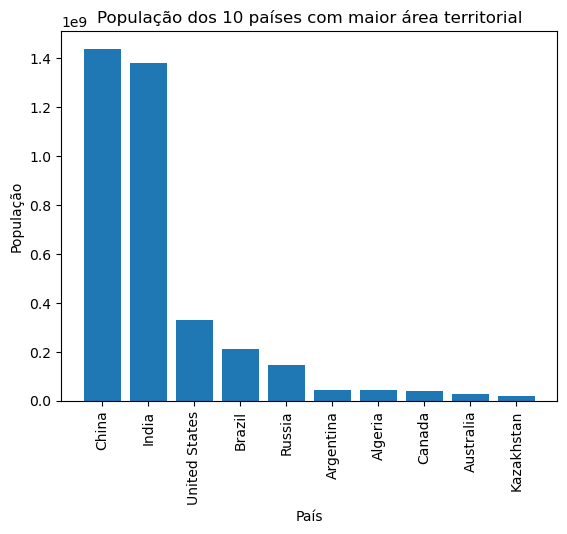

In [33]:
df= pd.read_csv("world_population.csv", encoding ='latin-1')
df = df.rename(columns={'Population(2020)': 'Population (2020)'})

df_top10 = df.nlargest(10, 'Land Area (KmÂ²)').sort_values('Population (2020)', ascending=False)
plt.bar(df_top10['Country/Other'], df_top10['Population (2020)'])
plt.title('População dos 10 países com maior área territorial')
plt.xlabel('País')
plt.ylabel('População')
plt.xticks(rotation=90)
plt.show()

Exercício 5 \
Utilizando o dataset "world_population.csv" exiba um gráfico de dispersão que exiba no eixo x a idade mediana do país e no eixo y a taxa de fertilidade. Olhando o gráfico resultante, responda o que é possível inferir a respeito da relação entre essas duas variáveis.

In [34]:
df.head()

Country/Other  Population (2020)  Yearly Change  Net Change  \
0          Afghanistan           38928346           2.33      886592   
1              Albania            2877797          -0.11       -3120   
2              Algeria           43851044           1.85      797990   
3               Angola           32866272           3.27     1040977   
4  Antigua and Barbuda              97929           0.84         811   

   Density (P/KmÂ²)  Land Area (KmÂ²)  Migrants (net)  Fert. Rate  Med. Age  \
0                60            652860          -62920         4.6        18   
1               105             27400          -14000         1.6        36   
2                18           2381740          -10000         3.1        29   
3                26           1246700            6413         5.6        17   
4               223               440               0         2.0        34   

   Urban Pop %  World Share  
0         25.0         0.50  
1         63.0         0.04  
2         73.0         0.56  
3         67.0         0.42  
4         26.0         0.00

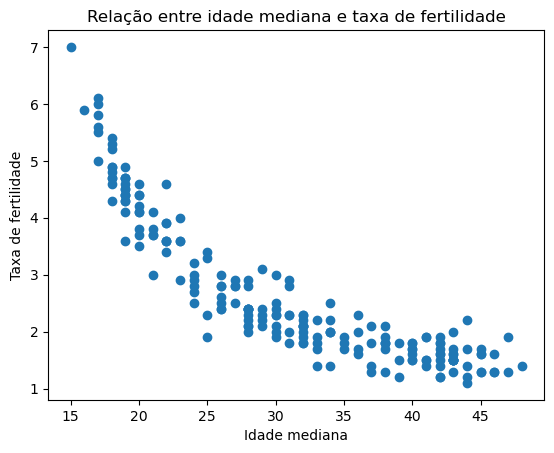

In [37]:
df= pd.read_csv("world_population.csv", encoding ='latin-1')
df = df[["Country/Other", "Med. Age", "Fert. Rate"]]
plt.scatter(df["Med. Age"], df["Fert. Rate"])
plt.title("Relação entre idade mediana e taxa de fertilidade")
plt.xlabel("Idade mediana")
plt.ylabel("Taxa de fertilidade")
plt.show()

Exercício 6 \
Utilizando o dataset "titanic.csv", crie dois gráficos de pizza lado a lado contendo o número de sobreviventes vs não sobreviventes do sexo masculino (pizza 1) e do sexo feminino (pizza 2).

In [40]:
df = pd.read_csv("titanic.csv")
df.head(5)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

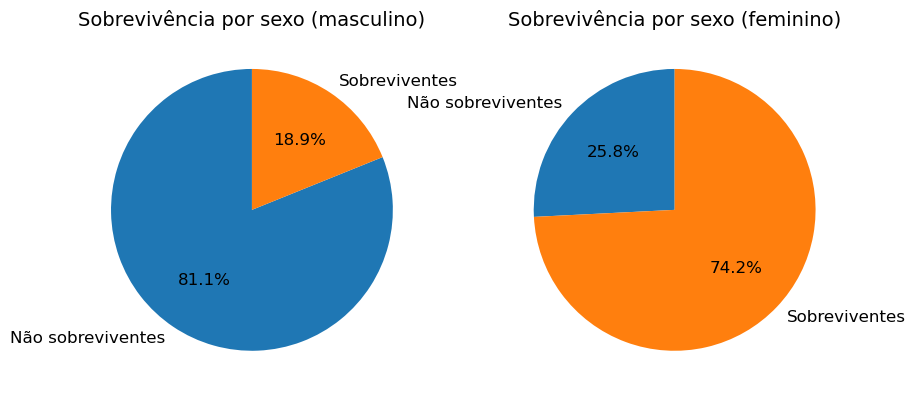

In [52]:
df = pd.read_csv("titanic.csv")

grouped = df.groupby(["Sex","Survived"])['PassengerId'].count().reset_index()

grouped = grouped[grouped['Survived'].isin([0,1])]

fig, ax = plt.subplots(1,2,figsize=(10,5))

male = grouped[grouped['Sex'] == 'male']
ax[0].pie(male['PassengerId'], labels=['Não sobreviventes', 'Sobreviventes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax[0].set_title('Sobrevivência por sexo (masculino)', fontsize=14)

female = grouped[grouped['Sex'] == 'female']
ax[1].pie(female['PassengerId'], labels=['Não sobreviventes', 'Sobreviventes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
ax[1].set_title('Sobrevivência por sexo (feminino)', fontsize=14)

plt.show()
